<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

<img src = "https://slitayem.github.io/img/blog/2020-08-04/churn.png" width=50%>

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [2]:
df = pd.read_csv("Churn.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.sample(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7329,7330,15648876,Sandover,501,France,Female,34,5,0.00,1,1,0,27380.99,0
5045,5046,15744691,Tsai,755,France,Female,29,3,0.00,3,1,0,4733.94,0
2961,2962,15583681,Layh,616,Spain,Male,31,7,76665.71,2,1,1,163809.08,0
8250,8251,15688865,Wade,850,France,Female,35,9,0.00,2,0,0,25329.48,0
4908,4909,15806256,Jackson,540,France,Male,48,2,109349.29,1,1,0,88703.04,1
7869,7870,15693771,Y?an,651,Spain,Female,45,8,95922.90,1,1,0,84782.42,1
3380,3381,15601184,Abramovich,604,Spain,Female,26,3,0.00,2,1,0,155248.62,0
1735,1736,15727251,Vincent,642,France,Male,30,8,117494.27,1,0,0,61977.82,0
1136,1137,15614220,Benson,750,France,Male,22,5,0.00,2,0,1,105125.65,0
7231,7232,15607986,Nnamutaezinwa,555,France,Male,40,10,139930.18,1,1,1,105720.09,0


In [5]:
df.shape

(10000, 14)

# EDA and Data Preprocessing

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Columns RowNumber, CustomerId, and Surname will certainly have no effect on exited; thus, we remove them.

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [13]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [14]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6537,521,Spain,Female,39,3,146408.68,1,0,0,72993.67,0
1564,773,Germany,Female,42,8,152324.66,2,1,0,171733.22,0
9789,610,France,Female,45,1,0.00,2,1,1,199657.46,0
7057,818,Germany,Female,72,8,135290.42,2,1,1,63729.72,0
4527,705,France,Male,38,1,189443.72,1,0,1,106648.58,0
1397,487,Germany,Female,46,4,135070.58,2,1,1,44244.49,1
5710,778,France,Male,34,5,139064.06,2,0,0,67949.32,0
8181,598,France,Male,28,8,129991.76,2,0,1,46041.08,0
2437,581,France,Male,41,8,0.00,2,0,0,29737.14,0
1862,481,France,Male,44,9,175303.06,1,1,0,65500.53,1


In [15]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [16]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Strorytelling - Visualization

In [18]:
df.groupby('Geography').count()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


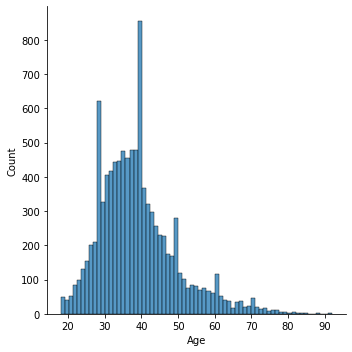

In [19]:
sns.displot(df, x="Age")

In [20]:
df.groupby('Tenure').sum()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Tenure,,,,,,,,
0,269294,16184,32989990.09,596,268,219,4.228070e+07,95
1,671515,40809,81304822.67,1542,701,569,1.039850e+08,232
2,684168,40933,80527928.54,1666,738,560,1.030314e+08,201
3,656385,39380,78367072.42,1547,730,524,9.854620e+07,213
4,644336,37819,73244740.73,1500,709,500,9.876923e+07,203
5,658334,39759,77361612.23,1573,700,506,1.025014e+08,209
6,626017,37580,71948612.53,1469,694,499,9.589616e+07,196
7,667795,39442,77667080.19,1573,726,535,1.040924e+08,177
8,663943,39412,79885013.21,1561,742,519,1.035989e+08,197


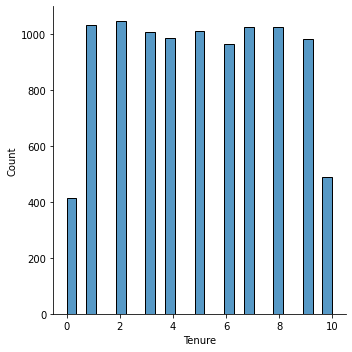

In [21]:
sns.displot(df, x="Tenure")

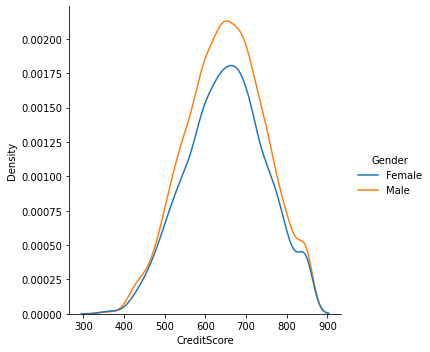

In [22]:
sns.displot(df, x="CreditScore", hue="Gender" , kind="kde") 

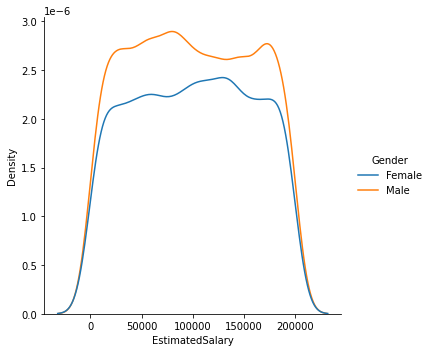

In [23]:
sns.displot(df, x="EstimatedSalary", hue="Gender" , kind="kde") 

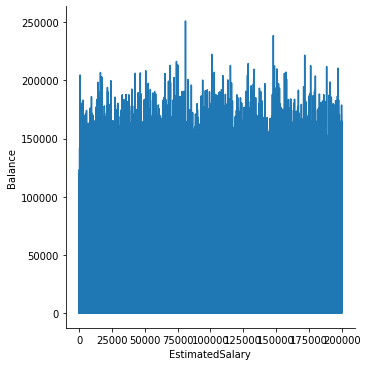

In [24]:
sns.relplot(x="EstimatedSalary", y="Balance", kind='line', data=df)

In [25]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(9, 9)

<AxesSubplot:>

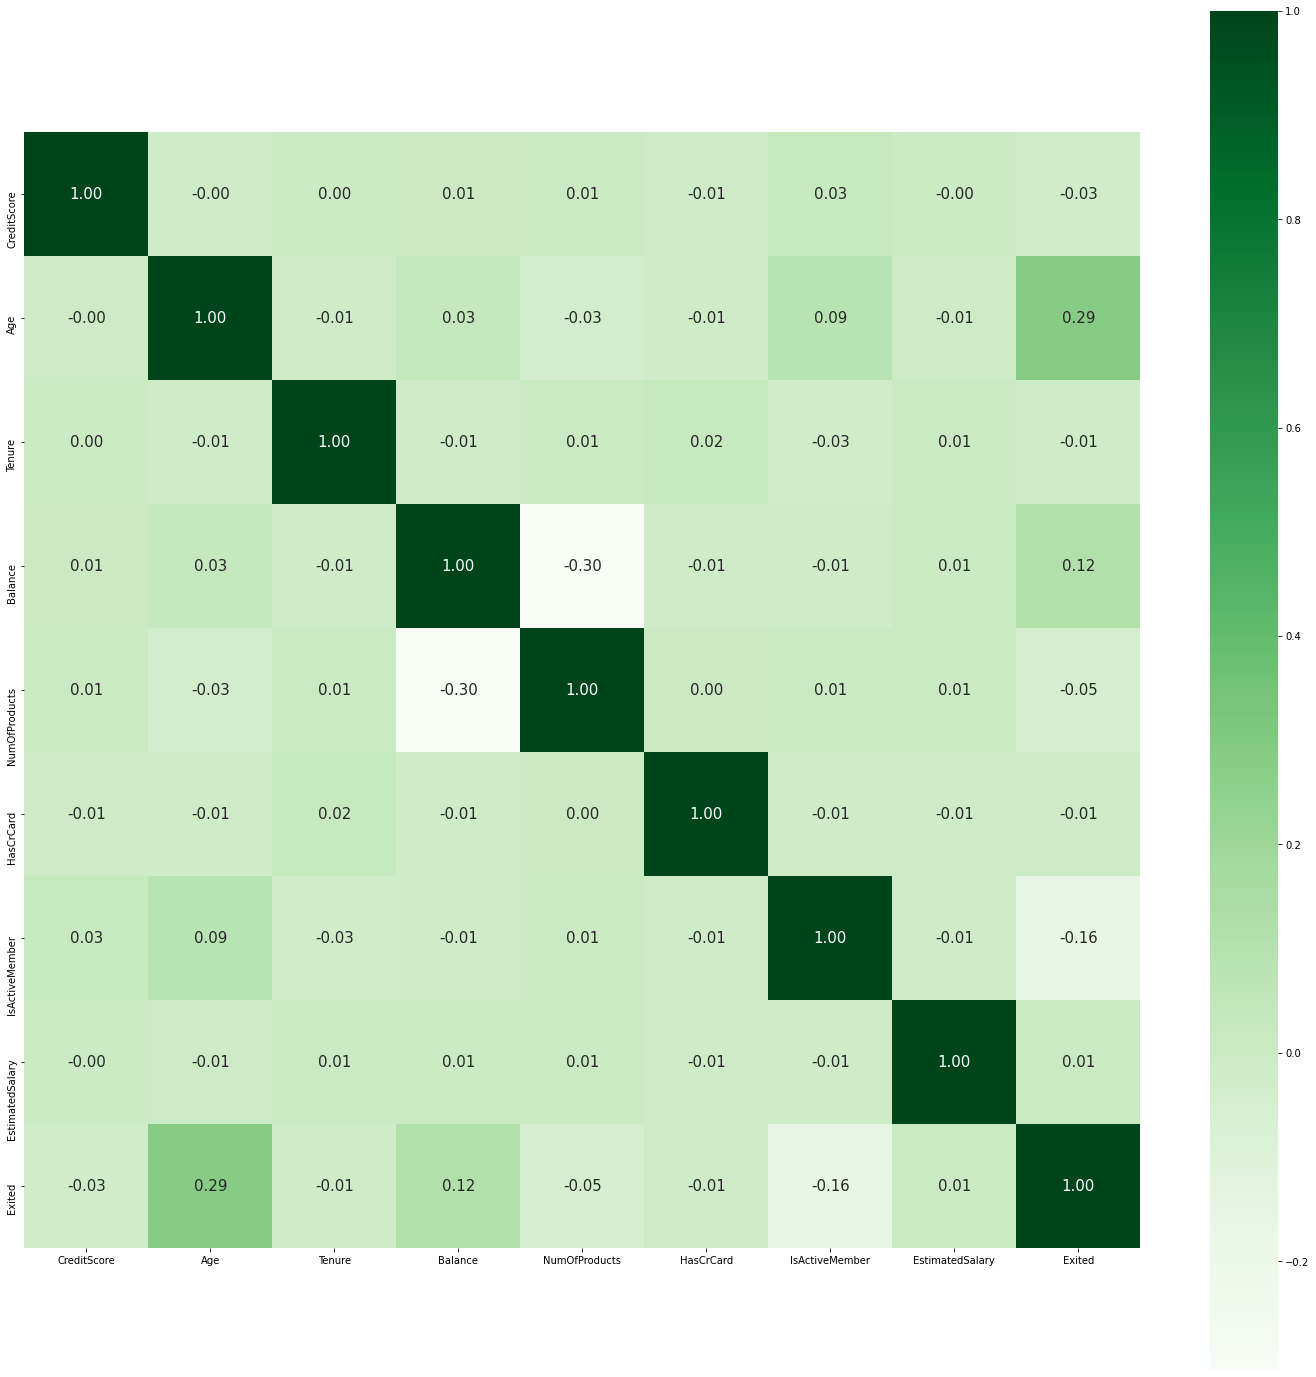

In [26]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar=True, square= True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Greens')

### According to the heatmap, columns Tenure, HasCrCard, and EstimatedSalary barely influence Exited; as a reslult, we remove them.

In [27]:
df.drop(columns=['Tenure', 'HasCrCard', 'EstimatedSalary'], axis=1, inplace=True)

In [28]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
8899,584,France,Female,41,0.00,2,1,0
1185,756,France,Male,37,132623.60,1,1,0
7756,621,Spain,Female,36,116338.68,1,1,0
7424,570,Germany,Male,38,127201.58,1,0,1
5255,799,France,Female,63,110314.21,2,0,1
680,482,France,Male,55,97318.25,1,1,0
6612,502,France,Female,64,139663.37,1,1,0
303,712,France,Female,33,0.00,2,1,0
1333,539,Germany,Female,38,82407.51,1,0,0
237,539,Germany,Female,43,116220.50,3,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Balance         10000 non-null  float64
 5   NumOfProducts   10000 non-null  int64  
 6   IsActiveMember  10000 non-null  int64  
 7   Exited          10000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


### Now, it's time to One-Hot the categorical columns

In [30]:
df_No_OneHot=df.copy()

In [31]:
df10=0

In [32]:
Geography=pd.get_dummies(df['Geography'])
df10 = pd.concat([df,Geography],axis=1)

In [33]:
df10

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,France,Germany,Spain
0,619,France,Female,42,0.00,1,1,1,1,0,0
1,608,Spain,Female,41,83807.86,1,1,0,0,0,1
2,502,France,Female,42,159660.80,3,0,1,1,0,0
3,699,France,Female,39,0.00,2,0,0,1,0,0
4,850,Spain,Female,43,125510.82,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0,1,0,0
9996,516,France,Male,35,57369.61,1,1,0,1,0,0
9997,709,France,Female,36,0.00,1,1,1,1,0,0
9998,772,Germany,Male,42,75075.31,2,0,1,0,1,0


In [34]:
df20=0

In [35]:
Gender=pd.get_dummies(df['Gender'])
df20 = pd.concat([df10,Gender],axis=1)

In [36]:
df20

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,0.00,1,1,1,1,0,0,1,0
1,608,Spain,Female,41,83807.86,1,1,0,0,0,1,1,0
2,502,France,Female,42,159660.80,3,0,1,1,0,0,1,0
3,699,France,Female,39,0.00,2,0,0,1,0,0,1,0
4,850,Spain,Female,43,125510.82,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0,1,0,0,0,1
9996,516,France,Male,35,57369.61,1,1,0,1,0,0,0,1
9997,709,France,Female,36,0.00,1,1,1,1,0,0,1,0
9998,772,Germany,Male,42,75075.31,2,0,1,0,1,0,0,1


In [37]:
df=df20.copy()

In [38]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,0.00,1,1,1,1,0,0,1,0
1,608,Spain,Female,41,83807.86,1,1,0,0,0,1,1,0
2,502,France,Female,42,159660.80,3,0,1,1,0,0,1,0
3,699,France,Female,39,0.00,2,0,0,1,0,0,1,0
4,850,Spain,Female,43,125510.82,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0,1,0,0,0,1
9996,516,France,Male,35,57369.61,1,1,0,1,0,0,0,1
9997,709,France,Female,36,0.00,1,1,1,1,0,0,1,0
9998,772,Germany,Male,42,75075.31,2,0,1,0,1,0,0,1


In [39]:
df=df.drop(columns=['Geography', 'Gender'], axis=1)

In [40]:
df

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Exited,France,Germany,Spain,Female,Male
0,619,42,0.00,1,1,1,1,0,0,1,0
1,608,41,83807.86,1,1,0,0,0,1,1,0
2,502,42,159660.80,3,0,1,1,0,0,1,0
3,699,39,0.00,2,0,0,1,0,0,1,0
4,850,43,125510.82,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0,1,0,0,0,1
9996,516,35,57369.61,1,1,0,1,0,0,0,1
9997,709,36,0.00,1,1,1,1,0,0,1,0
9998,772,42,75075.31,2,0,1,0,1,0,0,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CreditScore     10000 non-null  int64  
 1   Age             10000 non-null  int64  
 2   Balance         10000 non-null  float64
 3   NumOfProducts   10000 non-null  int64  
 4   IsActiveMember  10000 non-null  int64  
 5   Exited          10000 non-null  int64  
 6   France          10000 non-null  uint8  
 7   Germany         10000 non-null  uint8  
 8   Spain           10000 non-null  uint8  
 9   Female          10000 non-null  uint8  
 10  Male            10000 non-null  uint8  
dtypes: float64(1), int64(5), uint8(5)
memory usage: 517.7 KB


# Prepare Data for Machine learning

In [43]:
df1=df.drop(columns=['Exited'], axis=1)

In [44]:
df1

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,France,Germany,Spain,Female,Male
0,619,42,0.00,1,1,1,0,0,1,0
1,608,41,83807.86,1,1,0,0,1,1,0
2,502,42,159660.80,3,0,1,0,0,1,0
3,699,39,0.00,2,0,1,0,0,1,0
4,850,43,125510.82,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,1,0,0,0,1
9996,516,35,57369.61,1,1,1,0,0,0,1
9997,709,36,0.00,1,1,1,0,0,1,0
9998,772,42,75075.31,2,0,0,1,0,0,1


In [45]:
df2=df['Exited']

In [46]:
df2

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [47]:
X = df1.values
y = df2.values

In [49]:
X.shape

(10000, 10)

In [50]:
y.shape

(10000,)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
x_train.shape

(8000, 10)

In [54]:
x_train[0][5]

0.0

In [55]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train[:, 0:4] = mm.fit_transform(x_train[:, 0:4])
x_test[:, 0:4] = mm.transform(x_test[:, 0:4])

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 0:4] = sc.fit_transform(x_train[:, 0:4])
x_test[:, 0:4] = sc.transform(x_test[:, 0:4])

In [57]:
x_train

array([[-0.23082038, -0.94449979,  0.58817274, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25150912, -0.94449979,  0.46984886, ...,  0.        ,
         1.        ,  0.        ],
       [-0.3963303 ,  0.77498705,  0.85878772, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.22433188,  0.58393295, -1.22599173, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.13123255,  0.01077067, -1.22599173, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.1656695 ,  0.29735181,  0.37995545, ...,  0.        ,
         0.        ,  1.        ]])

### In order to find out which algorithm will yield better results, we exploit pycaret, and then we select the best method and train it separately.

### Since we need Google Colab to use PyCaret, we merely show the result in a table here.

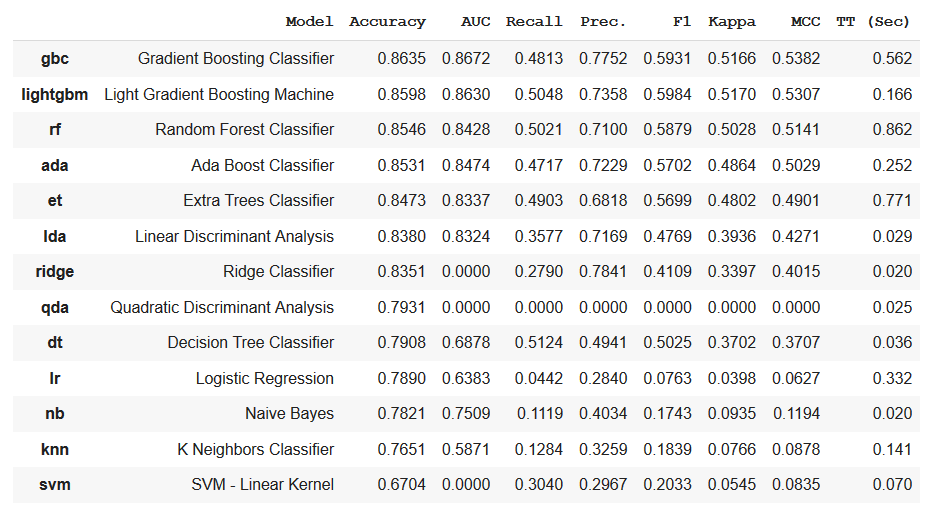

### According to the table, we use XGBoost as our model.

# Train your model

In [58]:
import xgboost as xgb

In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [61]:
# fit model on training data
model = XGBClassifier()
model.fit(x_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_pred = model.predict(x_test)

# Test the model and show the metrics

In [63]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  85.8


In [66]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test, y_pred)

In [67]:
confusion_matrix

array([[1509,   76],
       [ 208,  207]], dtype=int64)

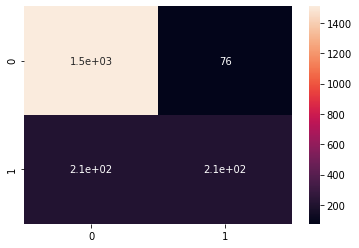

In [68]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [69]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.4987951807228916

In [70]:
# Method 3: Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1585
           1       0.73      0.50      0.59       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [71]:
model.feature_importances_

array([0.04241285, 0.11693691, 0.06209051, 0.3174463 , 0.20378484,
       0.0406155 , 0.11454058, 0.04743811, 0.05473444, 0.        ],
      dtype=float32)

In [77]:
x_train.shape

(8000, 10)

In [72]:
(model.feature_importances_).shape

(10,)

In [73]:
df.shape

(10000, 11)

In [74]:
df.columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Exited', 'France', 'Germany', 'Spain', 'Female', 'Male'],
      dtype='object')

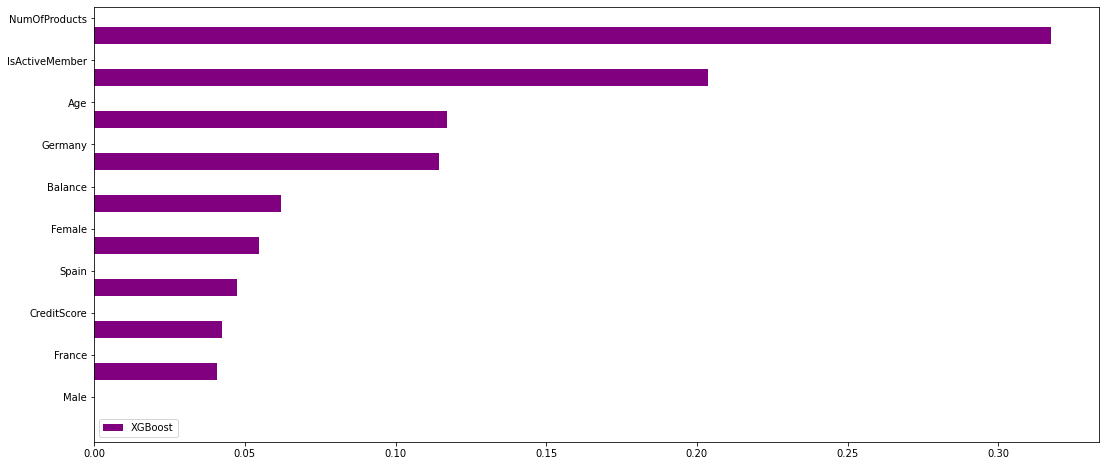

In [75]:
feature_importance=pd.DataFrame({'model':model.feature_importances_},index=df.drop(columns=['Exited']).columns)
feature_importance.sort_values(by='model',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
model_feature=ax.barh(index,feature_importance['model'],0.4,color='purple',label='XGBoost')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

In [ ]:
CreditScore 	Age 	Balance 	NumOfProducts 	IsActiveMember 	France 	Germany 	Spain 	Female 	Male

In [78]:
df.drop(columns=['Exited']).columns

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'France', 'Germany', 'Spain', 'Female', 'Male'],
      dtype='object')

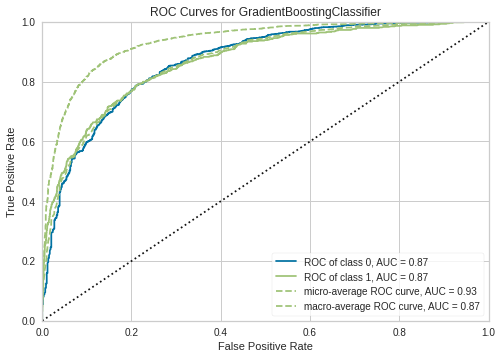

# Save your final model

In [79]:
file_name = "xgb_classifier_AmirhosseinGhadiri.pkl"

In [81]:
import pickle

In [82]:
pickle.dump(model, open(file_name, "wb"))

# Send us the Result (Maktabkhoone)